# Analyse Exploratoire des Données (EDA)
## Licences Sportives en France (2012-2023)


In [1]:
# Bibliothèques standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
pd.set_option("display.max_columns", 50)

df = pd.read_csv("lic_clean_2012_2023.csv")

print(df.shape)

df.head()

/var/folders/jd/hqn9gbgs6492hnbmz0p130mw0000gn/T/ipykernel_46486/3826739811.py:3: DtypeWarning: Columns (1,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("lic_clean_2012_2023.csv")


(10518260, 22)


,annee,code_commune,nom_commune,num_departement,region,code_fed,nom_fed,total_lic,total_f,total_h,h_1_9,h_10_19,h_20_29,h_30_59,h_60_74,h_75,f_1_9,f_10_19,f_20_29,f_30_59,f_60_74,f_75
0,2012,10002,AILLEVILLE,10,Grand Est,108,CYCLISME,2,0,2,0,0,0,2,0,0,0,0,0,0,0,0
1,2012,10002,AILLEVILLE,10,Grand Est,111,FOOTBALL,17,0,17,1,6,9,1,0,0,0,0,0,0,0,0
2,2012,10002,AILLEVILLE,10,Grand Est,117,"JUDO-JUJITSU, KENDO ET DISCIPLINES ASSOCIEES",1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2012,10002,AILLEVILLE,10,Grand Est,123,TENNIS,6,2,4,0,3,0,0,1,0,0,2,0,0,0,0
4,2012,10002,AILLEVILLE,10,Grand Est,127,TRIATHLON,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10518260 entries, 0 to 10518259
Data columns (total 22 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   annee            int64 
 1   code_commune     object
 2   nom_commune      object
 3   num_departement  object
 4   region           object
 5   code_fed         int64 
 6   nom_fed          object
 7   total_lic        object
 8   total_f          object
 9   total_h          object
 10  h_1_9            object
 11  h_10_19          object
 12  h_20_29          object
 13  h_30_59          object
 14  h_60_74          object
 15  h_75             object
 16  f_1_9            object
 17  f_10_19          object
 18  f_20_29          object
 19  f_30_59          object
 20  f_60_74          object
 21  f_75             object
dtypes: int64(2), object(20)
memory usage: 1.7+ GB


### Conversion et nettoyage des colonnes numériques

In [4]:
# Colonnes numériques à nettoyer
colonnes_numeriques = [
    "total_lic", "total_f", "total_h",
    "h_1_9", "h_10_19", "h_20_29", "h_30_59", "h_60_74", "h_75",
    "f_1_9", "f_10_19", "f_20_29", "f_30_59", "f_60_74", "f_75"
]

# Application du nettoyage
for col in colonnes_numeriques:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(" ", "", regex=False)      # Suppression des espaces
        .str.replace(",", ".", regex=False)     # Virgule → point
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

print(df[colonnes_numeriques].dtypes)

total_lic    float64
total_f      float64
total_h      float64
h_1_9        float64
h_10_19      float64
h_20_29      float64
h_30_59      float64
h_60_74      float64
h_75         float64
f_1_9        float64
f_10_19      float64
f_20_29      float64
f_30_59      float64
f_60_74      float64
f_75         float64
dtype: object


### Analyse des valeurs manquantes

VALEURS MANQUANTES DÉTECTÉES
             Nombre_Manquant  Pourcentage
h_10_19                20954     0.199215
h_20_29                20954     0.199215
h_75                   20954     0.199215
h_60_74                20954     0.199215
h_30_59                20954     0.199215
h_1_9                  20954     0.199215
f_60_74                20952     0.199196
f_30_59                20952     0.199196
f_20_29                20952     0.199196
f_10_19                20952     0.199196
f_1_9                  20952     0.199196
f_75                   20952     0.199196
total_f                20631     0.196145
total_h                20629     0.196126
nom_fed                17825     0.169467
nom_commune             7430     0.070639
region                  4192     0.039855
total_lic                 24     0.000228


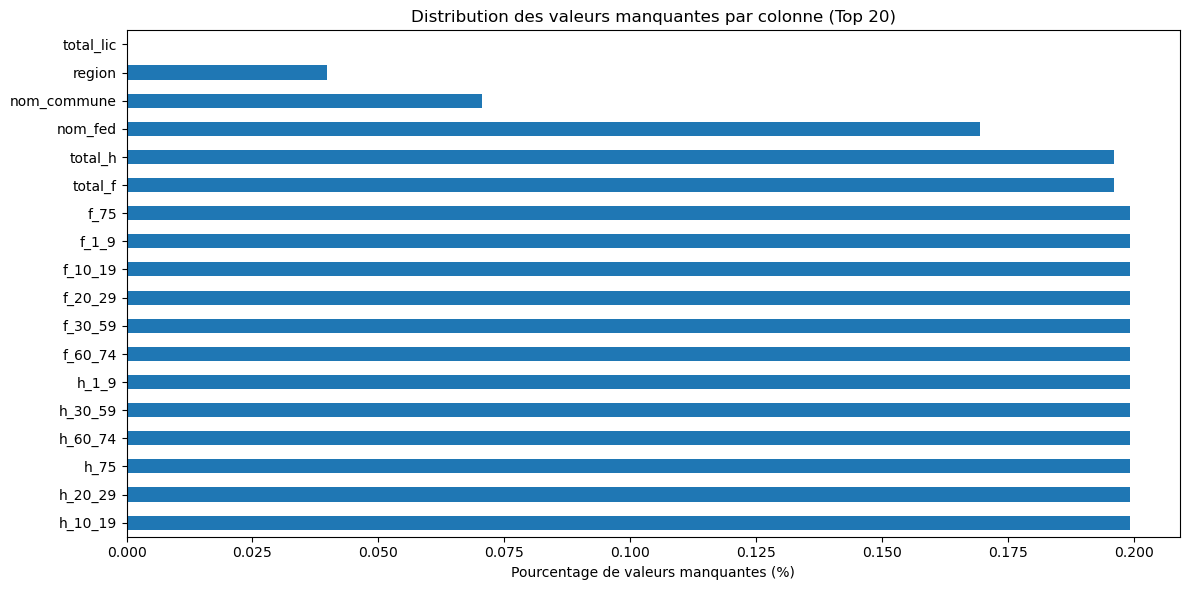

In [5]:
# Calcul des valeurs manquantes
valeurs_manquantes = df.isna().sum().sort_values(ascending=False)
valeurs_manquantes_pct = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

# Tableau de valeurs manquantes
missing_summary = pd.DataFrame({
    'Nombre_Manquant': valeurs_manquantes,
    'Pourcentage': valeurs_manquantes_pct
})

missing_summary = missing_summary[missing_summary['Nombre_Manquant'] > 0]

if len(missing_summary) > 0:
    print("VALEURS MANQUANTES DÉTECTÉES")
    print(missing_summary.head(20))
    
    # Visualisation
    if len(missing_summary) > 0:
        plt.figure(figsize=(12, 6))
        missing_summary.head(20)['Pourcentage'].plot(kind='barh')
        plt.xlabel('Pourcentage de valeurs manquantes (%)')
        plt.title('Distribution des valeurs manquantes par colonne (Top 20)')
        plt.tight_layout()
        plt.show()
else:
    print("✓ Aucune valeur manquante détectée dans le dataset")

## Vue d'ensemble du dataset

In [6]:
print(f"Période temporelle    : {df['annee'].min()} → {df['annee'].max()} ({df['annee'].nunique()} années)")
print(f"Communes représentées : {df['code_commune'].nunique():,}")
print(f"Départements couverts : {df['num_departement'].nunique()}")
print(f"Régions concernées    : {df['region'].nunique()}")
print(f"Fédérations sportives : {df['code_fed'].nunique()}")
print(f"\nNombre total d'observations : {len(df):,}")

Période temporelle    : 2012 → 2023 (12 années)
Communes représentées : 38,842
Départements couverts : 210
Régions concernées    : 25
Fédérations sportives : 129

Nombre total d'observations : 10,518,260


## Stats Descriptives

In [7]:
df['total_lic'].describe()

count    1.051824e+07
mean     1.621052e+01
std      8.557638e+01
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      3.319400e+04
Name: total_lic, dtype: float64

In [8]:
# Statistiques descriptives des variables numériques
colonnes_num = df.select_dtypes(include=[np.number]).columns
stats_desc = df[colonnes_num].describe().T

## Analyse temporelle

In [9]:
# Calculer le total par année
evolution_annuelle = df.groupby('annee')['total_lic'].sum().reset_index()

# Calculer la variation en pourcentage
evolution_annuelle['variation_pourcentage'] = evolution_annuelle['total_lic'].pct_change() * 100


print("ÉVOLUTION DES LICENCES PAR ANNÉE")

print(evolution_annuelle)

# Statistiques globales
total_2012 = evolution_annuelle.iloc[0]['total_lic']
total_2023 = evolution_annuelle.iloc[-1]['total_lic']
print(f"\nLicences 2012 : {total_2012:,.0f}")
print(f"Licences 2023 : {total_2023:,.0f}")
print(f"Variation totale : {((total_2023/total_2012 - 1)*100):+.2f}%")

ÉVOLUTION DES LICENCES PAR ANNÉE
    annee   total_lic  variation_pourcentage
0    2012  11243177.0                    NaN
1    2013  11865503.0               5.535144
2    2014  12668709.0               6.769254
3    2015  13800283.0               8.932039
4    2016  15619764.0              13.184375
5    2017  14557672.0              -6.799667
6    2018  14429314.0              -0.881721
7    2019  15880199.0              10.055121
8    2020  15744208.0              -0.856356
9    2021  12870350.0             -18.253430
10   2022  15291830.0              18.814407
11   2023  16535056.0               8.130001

Licences 2012 : 11,243,177
Licences 2023 : 16,535,056
Variation totale : +47.07%


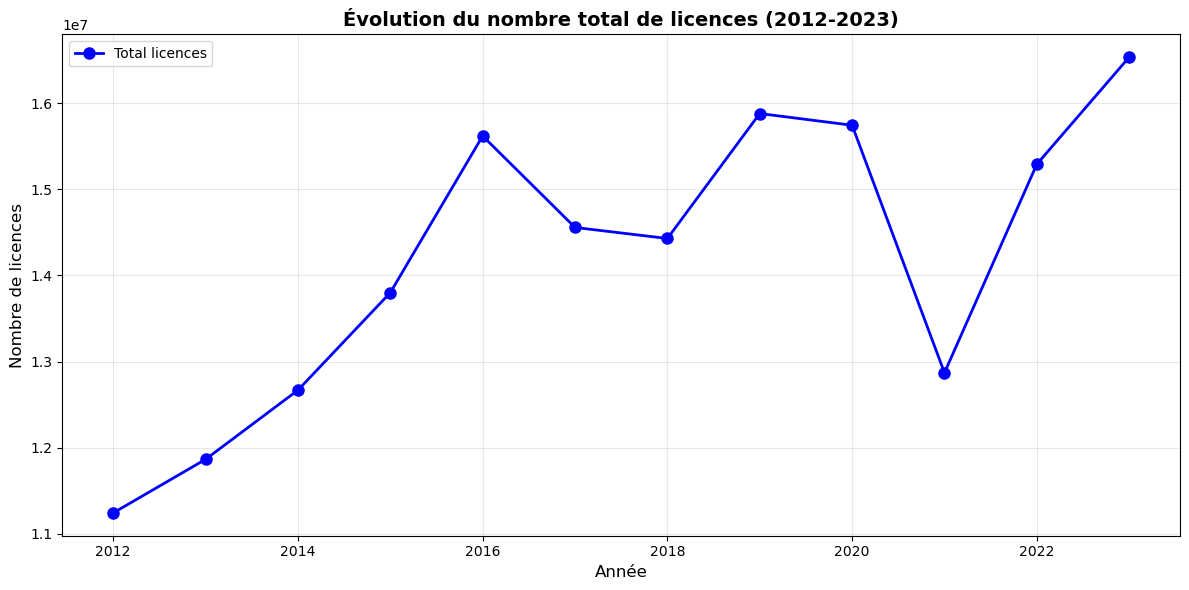

In [10]:
# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(evolution_annuelle['annee'], evolution_annuelle['total_lic'], 
         marker='o', linewidth=2, markersize=8, color='blue', label='Total licences')

# Ajouter les labels et le titre
plt.title('Évolution du nombre total de licences (2012-2023)', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de licences', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

##  Analyse par Sexe (Hommes / Femmes)

In [12]:
# Calculer les totaux par sexe
evolution_sexe = df.groupby('annee').agg({
    'total_h': 'sum',
    'total_f': 'sum'
}).reset_index()

# Calculer les pourcentages
total_par_annee = evolution_sexe['total_h'] + evolution_sexe['total_f']
evolution_sexe['part_h'] = (evolution_sexe['total_h'] / total_par_annee * 100)
evolution_sexe['part_f'] = (evolution_sexe['total_f'] / total_par_annee * 100)


print("RÉPARTITION HOMMES / FEMMES")

print(evolution_sexe)

print(f"\nRépartition moyenne sur la période :")
print(f"  Hommes : {evolution_sexe['part_h'].mean():.1f}%")
print(f"  Femmes : {evolution_sexe['part_f'].mean():.1f}%")

RÉPARTITION HOMMES / FEMMES
    annee     total_h    total_f     part_h     part_f
0    2012   7097633.0  4137238.0  63.175029  36.824971
1    2013   7389972.0  4145472.0  64.063178  35.936822
2    2014   8075522.0  4581422.0  63.803095  36.196905
3    2015   8667254.0  5118021.0  62.873276  37.126724
4    2016   9680970.0  5938794.0  61.978977  38.021023
5    2017   9084571.0  5473101.0  62.404009  37.595991
6    2018   8964039.0  5465275.0  62.123806  37.876194
7    2019   9778576.0  6101623.0  61.577163  38.422837
8    2020   9599714.0  6144494.0  60.972988  39.027012
9    2021   8020585.0  4849765.0  62.318313  37.681687
10   2022   9464722.0  5827108.0  61.893979  38.106021
11   2023  10144693.0  6390363.0  61.352638  38.647362

Répartition moyenne sur la période :
  Hommes : 62.4%
  Femmes : 37.6%


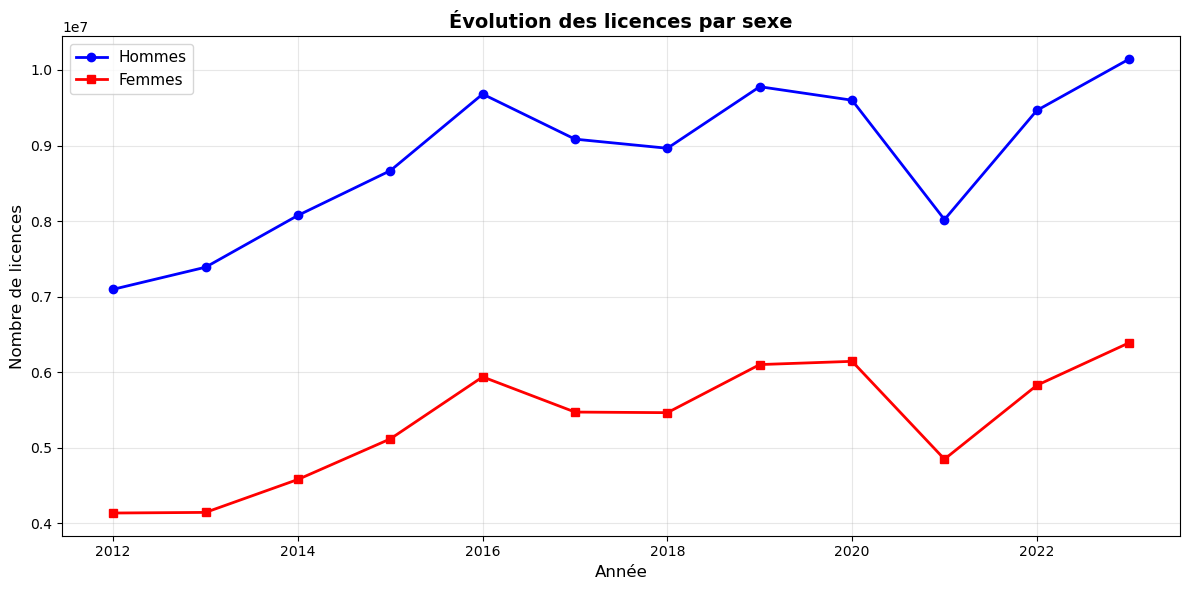

In [13]:
# Créer le graphique
plt.figure(figsize=(12, 6))

# Tracer les deux courbes
plt.plot(evolution_sexe['annee'], evolution_sexe['total_h'], 
         marker='o', linewidth=2, label='Hommes', color='blue')
plt.plot(evolution_sexe['annee'], evolution_sexe['total_f'], 
         marker='s', linewidth=2, label='Femmes', color='red')

# Ajouter les labels
plt.title('Évolution des licences par sexe', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de licences', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##  Analyse par Fédération

In [14]:
# Calculer le total par fédération
top_federations = df.groupby('nom_fed')['total_lic'].sum().sort_values(ascending=False)

print("TOP 20 DES FÉDÉRATIONS SPORTIVES")

print(top_federations.head(20))

# Calculer la part de marché
total_global = top_federations.sum()
print(f"\nTop 3 représente : {(top_federations.head(3).sum() / total_global * 100):.1f}% du total")

TOP 20 DES FÉDÉRATIONS SPORTIVES
nom_fed
FOOTBALL                                                24145683.0
UNION NATIONALE SPORT SCOLAIRE (UNSS)                   12324824.0
TENNIS                                                  11883122.0
EQUITATION                                               7629385.0
UNION SPORTIVE L'ENSEIGNEMENT PREMIER DEGRE              6254009.0
BASKETBALL                                               5916940.0
HANDBALL                                                 5667175.0
EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE             5381052.0
SPORTIVE EDUCATIVE L'ENSEIGNEMENT CATHOLIQUE (UGSEL)     4950162.0
GOLF                                                     4732850.0
NATATION                                                 3771574.0
RUGBY                                                    3537280.0
GYMNASTIQUE                                              3444369.0
ATHLETISME                                               3338658.0
PETANQUE ET JEU PROVE

###  Graphique : Top 15 Fédérations

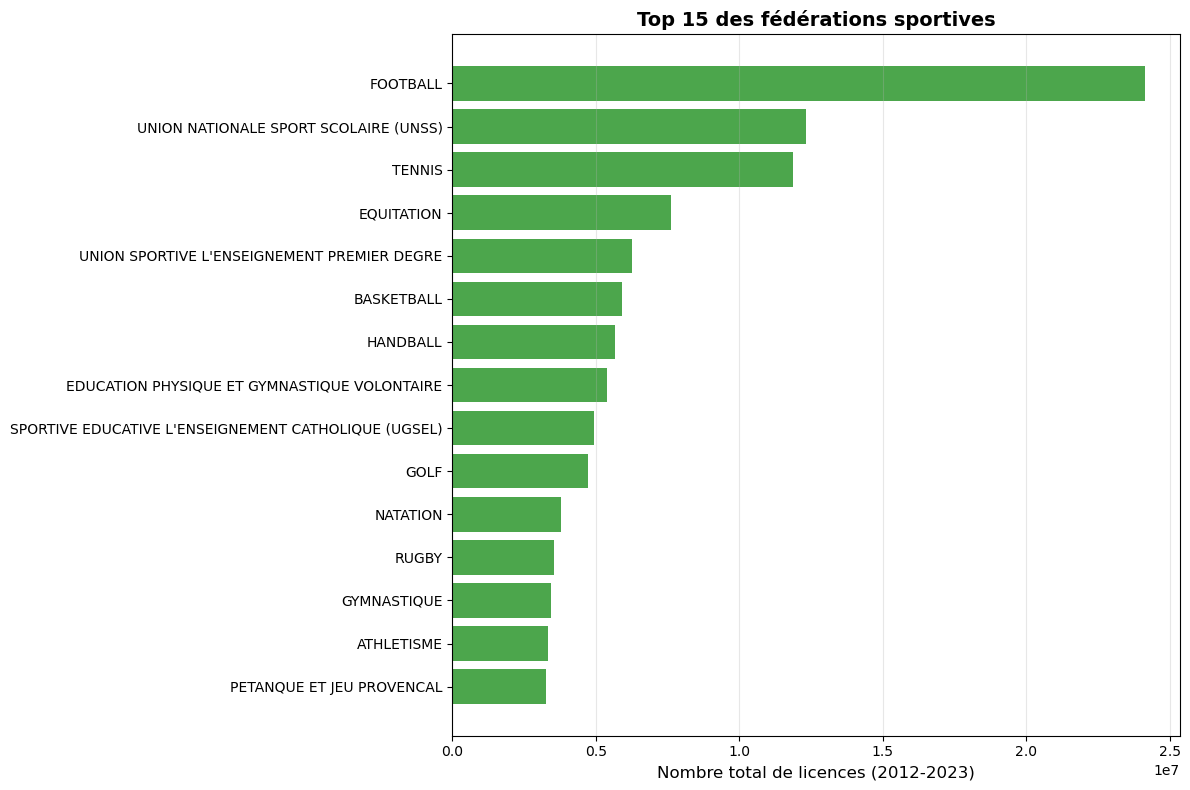

In [15]:
# Prendre le top 15
top_15 = top_federations.head(15)

# Créer le graphique (barres horizontales)
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15)), top_15.values[::-1], color='green', alpha=0.7)
plt.yticks(range(len(top_15)), top_15.index[::-1])
plt.xlabel('Nombre total de licences (2012-2023)', fontsize=12)
plt.title('Top 15 des fédérations sportives', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

##  Analyse par Tranche d'Âge

Comment les licences se répartissent-elles par âge ?

In [16]:
# Définir les colonnes d'âge
colonnes_age_h = ["h_1_9", "h_10_19", "h_20_29", "h_30_59", "h_60_74", "h_75"]
colonnes_age_f = ["f_1_9", "f_10_19", "f_20_29", "f_30_59", "f_60_74", "f_75"]
tranches_labels = ['1-9 ans', '10-19 ans', '20-29 ans', '30-59 ans', '60-74 ans', '75+ ans']

# Calculer les totaux
totaux_h = df[colonnes_age_h].sum().values
totaux_f = df[colonnes_age_f].sum().values

# Créer un DataFrame
age_distribution = pd.DataFrame({
    'Tranche': tranches_labels,
    'Hommes': totaux_h,
    'Femmes': totaux_f
})
age_distribution['Total'] = age_distribution['Hommes'] + age_distribution['Femmes']
age_distribution['%_Total'] = (age_distribution['Total'] / age_distribution['Total'].sum() * 100).round(1)


print("DISTRIBUTION PAR TRANCHE D'ÂGE")

print(age_distribution)

DISTRIBUTION PAR TRANCHE D'ÂGE
     Tranche       Hommes       Femmes        Total  %_Total
0    1-9 ans   26941796.0   22145293.0   49087089.0      4.8
1  10-19 ans  521270905.0  185545334.0  706816239.0     69.6
2  20-29 ans   11301696.0    4795114.0   16096810.0      1.6
3  30-59 ans  159747875.0   66015482.0  225763357.0     22.2
4  60-74 ans    8835647.0    7099789.0   15935436.0      1.6
5    75+ ans    1431486.0    1116254.0    2547740.0      0.3


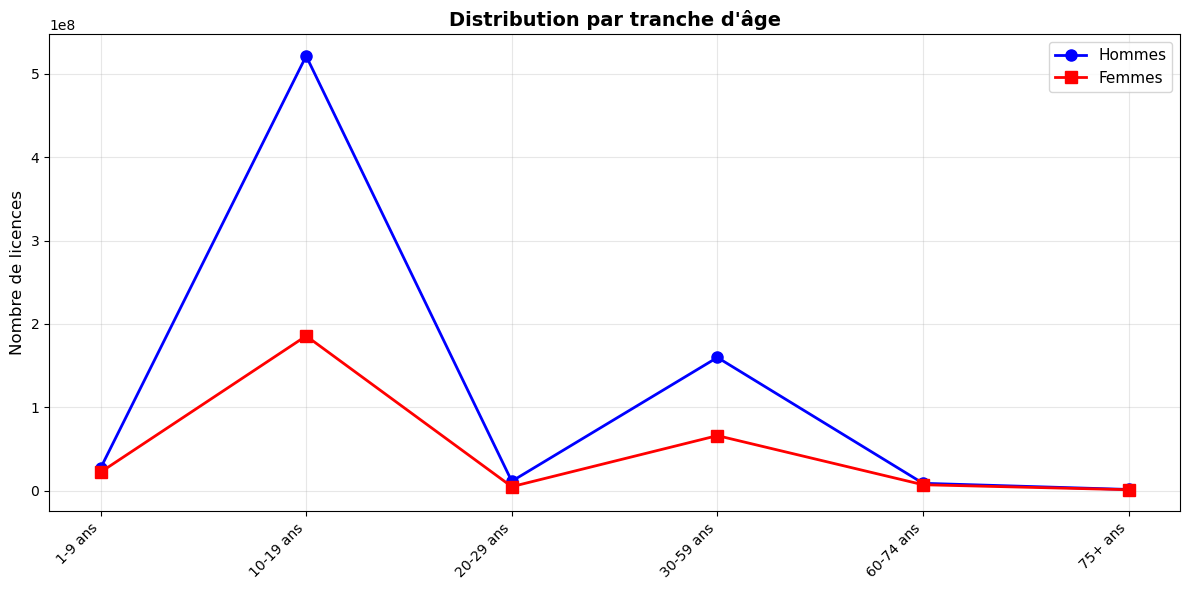

In [17]:
# Créer le graphique
plt.figure(figsize=(12, 6))
x_pos = range(len(tranches_labels))

# Tracer les deux courbes
plt.plot(x_pos, totaux_h, marker='o', linewidth=2, markersize=8, label='Hommes', color='blue')
plt.plot(x_pos, totaux_f, marker='s', linewidth=2, markersize=8, label='Femmes', color='red')

# Configurer le graphique
plt.xticks(x_pos, tranches_labels, rotation=45, ha='right')
plt.ylabel('Nombre de licences', fontsize=12)
plt.title('Distribution par tranche d\'âge', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##  Analyse Géographique : Départements

Quels sont les départements avec le plus de licences ?

In [18]:
# Calculer le total par département
top_departements = df.groupby('num_departement')['total_lic'].sum().sort_values(ascending=False)


print("TOP 15 DÉPARTEMENTS")

print(top_departements.head(15))

TOP 15 DÉPARTEMENTS
num_departement
59    6242331.0
44    4509824.0
78    4490456.0
33    4394294.0
69    4360466.0
13    4327606.0
38    3836575.0
91    3573356.0
92    3456340.0
77    3433852.0
35    3268924.0
62    3265312.0
67    3117346.0
76    2972041.0
75    2774751.0
Name: total_lic, dtype: float64


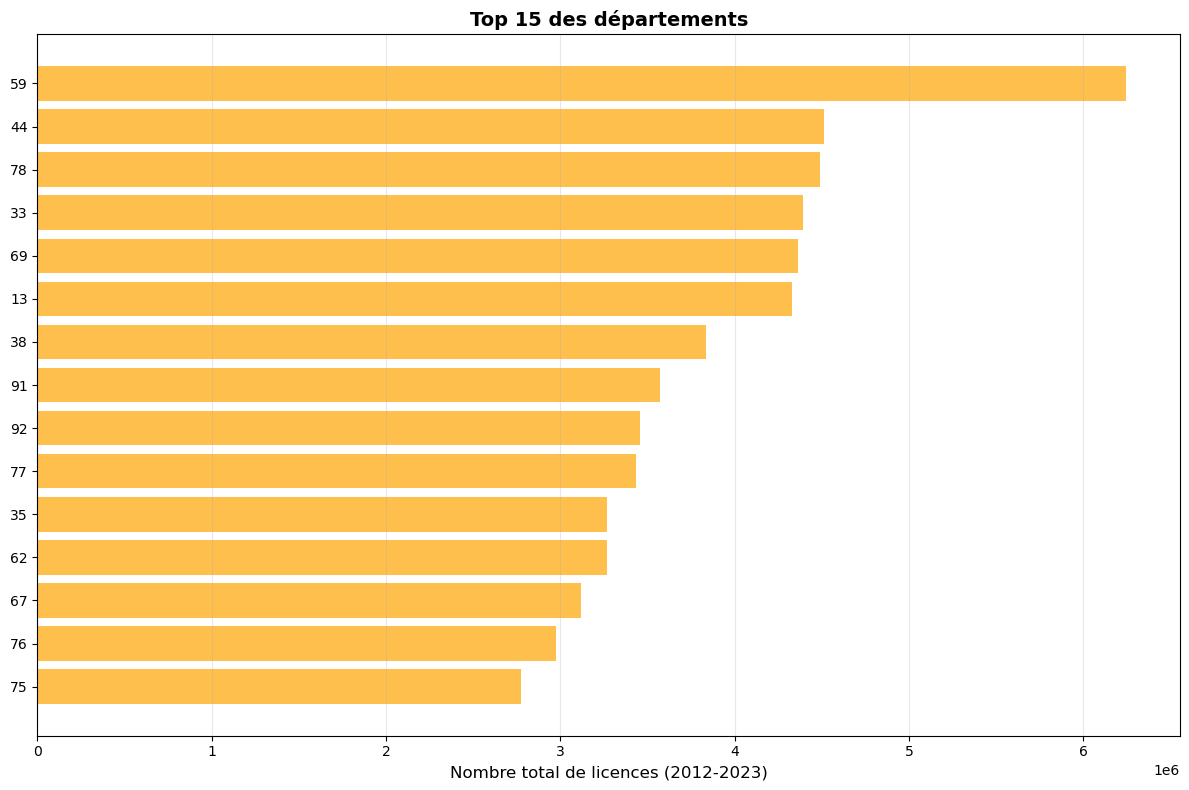

In [19]:
# Prendre le top 15
top_15_dep = top_departements.head(15)

# Créer le graphique
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_15_dep)), top_15_dep.values[::-1], color='orange', alpha=0.7)
plt.yticks(range(len(top_15_dep)), top_15_dep.index[::-1])
plt.xlabel('Nombre total de licences (2012-2023)', fontsize=12)
plt.title('Top 15 des départements', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## Analyse Géographique : Régions

Classement de toutes les régions françaises.

In [20]:
# Calculer le total par région
classement_regions = df.groupby('region')['total_lic'].sum().sort_values(ascending=False)

# Calculer les parts
total_national = classement_regions.sum()
classement_regions_df = classement_regions.reset_index()
classement_regions_df.columns = ['Région', 'Total Licences']
classement_regions_df['Part (%)'] = (classement_regions_df['Total Licences'] / total_national * 100).round(2)


print("CLASSEMENT DES RÉGIONS")

print(classement_regions_df)

CLASSEMENT DES RÉGIONS
                        Région  Total Licences  Part (%)
0                Île-de-France      26916983.0     15.82
1         Auvergne-Rhône-Alpes      21812434.0     12.82
2           Nouvelle-Aquitaine      17071303.0     10.03
3                    Occitanie      16005681.0      9.40
4                    Grand Est      14209177.0      8.35
5              Hauts-de-France      13952069.0      8.20
6   Provence-Alpes-Côte d'Azur      11363938.0      6.68
7             Pays de la Loire      11209068.0      6.59
8                     Bretagne      10136480.0      5.96
9                    Normandie       8122242.0      4.77
10     Bourgogne-Franche-Comté       7135892.0      4.19
11         Centre-Val de Loire       5879682.0      3.45
12                      Centre       1217800.0      0.72
13                  La Réunion       1027298.0      0.60
14                        DROM        998576.0      0.59
15                       Corse        782307.0      0.46
16      

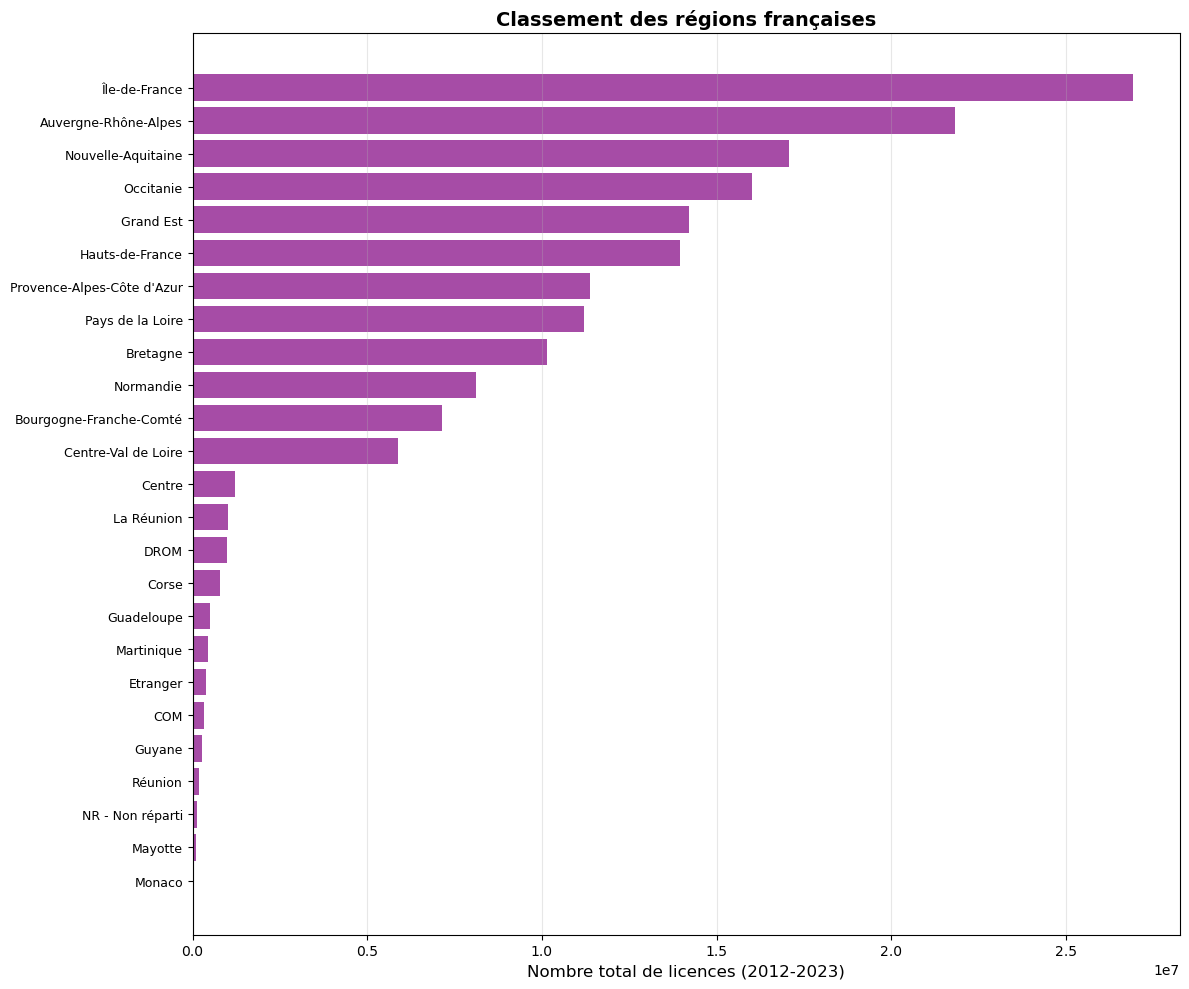

In [21]:
# Créer le graphique
plt.figure(figsize=(12, 10))
plt.barh(range(len(classement_regions)), classement_regions.values[::-1], color='purple', alpha=0.7)
plt.yticks(range(len(classement_regions)), classement_regions.index[::-1], fontsize=9)
plt.xlabel('Nombre total de licences (2012-2023)', fontsize=12)
plt.title('Classement des régions françaises', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

##  Analyse de la Parité

Quelles fédérations sont les plus/moins féminisées ?

In [22]:
# Calculer la part des femmes par fédération
parite_federations = df.groupby('nom_fed').agg({
    'total_lic': 'sum',
    'total_f': 'sum',
    'total_h': 'sum'
}).reset_index()

parite_federations['part_femmes'] = (parite_federations['total_f'] / parite_federations['total_lic'] * 100).round(2)

# Filtrer les grandes fédérations (> 10 000 licences)
parite_grandes = parite_federations[parite_federations['total_lic'] > 10000].sort_values('part_femmes', ascending=False)


print("TOP 10 : FÉDÉRATIONS LES PLUS FÉMINISÉES")

print(parite_grandes.head(10)[['nom_fed', 'part_femmes']])


print("TOP 10 : FÉDÉRATIONS LES MOINS FÉMINISÉES")

print(parite_grandes.tail(10)[['nom_fed', 'part_femmes']])

TOP 10 : FÉDÉRATIONS LES PLUS FÉMINISÉES
                                          nom_fed  part_femmes
153                                TWIRLING BATON        92.67
37   EDUCATION PHYSIQUE ET GYMNASTIQUE VOLONTAIRE        91.71
135                       SPORTIVE TWIRLING BATON        91.13
126                               SPORT POUR TOUS        87.44
138                                  SPORTS GLACE        87.04
139                              SPORTS POUR TOUS        86.47
33                                          DANSE        85.70
38                                     EQUITATION        83.46
58                                    GYMNASTIQUE        81.81
131                 SPORTIVE ET CULTURELLE FRANCE        74.16
TOP 10 : FÉDÉRATIONS LES MOINS FÉMINISÉES
                          nom_fed  part_femmes
136                SPORTS BILLARD         6.51
164     VOITURES RADIO COMMANDEES         5.82
91                   MOTOCYCLISME         5.66
101              PECHES SPORTIVES   

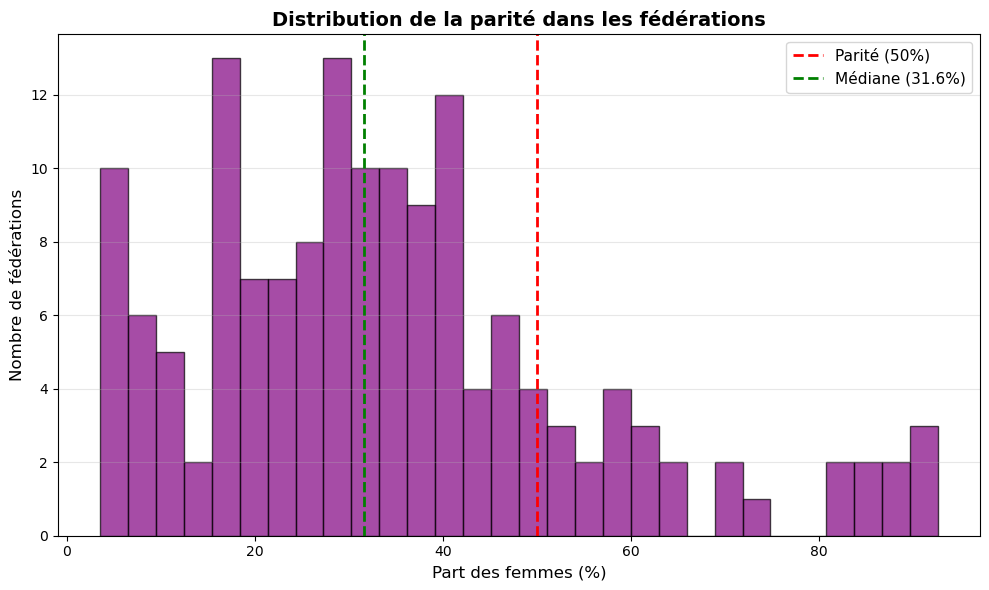

In [23]:
# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(parite_grandes['part_femmes'], bins=30, color='purple', alpha=0.7, edgecolor='black')

# Ajouter des lignes de référence
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='Parité (50%)')
plt.axvline(x=parite_grandes['part_femmes'].median(), color='green', 
            linestyle='--', linewidth=2, label=f'Médiane ({parite_grandes["part_femmes"].median():.1f}%)')

plt.xlabel('Part des femmes (%)', fontsize=12)
plt.ylabel('Nombre de fédérations', fontsize=12)
plt.title('Distribution de la parité dans les fédérations', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()